# ***ETL Musical Project***

Jimena Cabrera Martinez


Analitica y visualizacion de datos

El dataset contiene canciones de diferentes géneros musicales, como rock y hip-hop, junto con sus respectivos artistas. El objetivo es analizar y visualizar los datos para obtener información sobre las tendencias musicales. Fue obtenido de https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

- **track_id**: El ID de Spotify para la pista.
- **artists**: Los nombres de los artistas que interpretan la pista. Si hay más de un artista, están separados por un `;`.
- **album_name**: El nombre del álbum en el que aparece la pista.
- **track_name**: Nombre de la pista.
- **popularity**: La popularidad de una pista es un valor entre 0 y 100, donde 100 es la más popular. La popularidad se calcula mediante un algoritmo y se basa, principalmente, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones. En general, las canciones que se están reproduciendo mucho actualmente tendrán una popularidad mayor que las que se reprodujeron mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista en un sencillo y en un álbum) se califican de manera independiente. La popularidad de un artista o álbum se deriva matemáticamente de la popularidad de sus pistas.
- **duration_ms**: Duración de la pista en milisegundos.
- **explicit**: Indica si la pista tiene letras explícitas (`true` = sí tiene; `false` = no tiene o se desconoce).
- **danceability**: La bailabilidad describe qué tan adecuada es una pista para bailar, basada en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del pulso y la regularidad general. Un valor de 0.0 indica que es poco bailable y 1.0 que es muy bailable.
- **energy**: Energía es una medida de 0.0 a 1.0 que representa la intensidad y actividad percibida. Generalmente, las pistas con alta energía se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach tiene una puntuación baja.
- **key**: La tonalidad en la que está la pista. Los enteros se asignan a tonos usando la notación estándar de Clase de Tono (Pitch Class). Ej., 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta ninguna tonalidad, el valor es -1.
- **loudness**: La sonoridad general de una pista en decibelios (dB).
- **mode**: El modo indica la modalidad (mayor o menor) de una pista, es decir, el tipo de escala del que se deriva su contenido melódico. Mayor se representa con 1 y menor con 0.
- **speechiness**: La locuacidad detecta la presencia de palabras habladas en una pista. Cuanto más se parezca la grabación al habla (por ejemplo, programas de radio, audiolibros, poesía), más cercano a 1.0 será el valor. Valores por encima de 0.66 describen pistas probablemente compuestas totalmente de habla. Valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como habla, ya sea por secciones o mezcladas, como en el rap. Valores por debajo de 0.33 probablemente representen música u otras pistas no habladas.
- **acousticness**: Medida de confianza (de 0.0 a 1.0) sobre si la pista es acústica. 1.0 representa alta confianza en que la pista es acústica.
- **instrumentalness**: Predice si una pista no contiene voces. Sonidos como “ooh” y “aah” se consideran instrumentales en este contexto. Las pistas de rap o con palabras habladas claramente se consideran “vocales”. Cuanto más cercano a 1.0 sea el valor, mayor es la probabilidad de que no tenga contenido vocal.
- **liveness**: Detecta la presencia de una audiencia en la grabación. Valores altos indican una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor por encima de 0.8 indica una fuerte probabilidad de que sea una grabación en vivo.
- **valence**: Medida de 0.0 a 1.0 que describe el grado de positividad emocional transmitido por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las de baja valencia suenan más negativas (por ejemplo, tristes, depresivas, enojadas).
- **tempo**: Tempo general estimado de una pista en pulsos por minuto (BPM). En términos musicales, el tempo es la velocidad o ritmo de una pieza musical, derivado directamente de la duración promedio de los pulsos.
- **time_signature**: Compás estimado. El compás (o métrica) es una convención que indica cuántos pulsos hay en cada compás. El valor varía de 3 a 7, indicando compases de 3/4 hasta 7/4.
- **track_genre**: El género al que pertenece la pista.

In [ ]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from ydata_profiling import ProfileReport



# *Extract*

In [ ]:
# Cargamos el dataset
df_musica = pd.read_csv('data_music.csv', encoding='utf-8')

In [ ]:
df_musica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
display(df_musica)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# *Transform*

In [ ]:
#borramos las columnas innecesarias

df_musica = df_musica.drop(columns=['Unnamed: 0', 'track_id'])

In [ ]:
display(df_musica)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
# revisamos si hay valores nulos
df_musica.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
# eliminamos las filas con valores nulos

df_musica = df_musica.dropna(subset=["artists", "album_name", "track_name"])



In [ ]:
display(df_musica)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
#Revisamos nuevamente si hay valores nulos, y vemos que ya no hay ninguno

df_musica.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
#Revisamos si hay duplicados
duplicados_nombre= df_musica[df_musica.duplicated(subset=['track_name', 'artists'], keep=False)]

print(len(duplicados_nombre))

49157


In [ ]:
#Eliminamos los duplicados por nombre de la canción y artista
df_musica = df_musica.drop_duplicates(subset=['track_name', 'artists'], keep='first')

#Volvemos a revisar si hay duplicados
duplicados_nombre = df_musica[df_musica.duplicated(subset=['track_name', 'artists'], keep=False)]
print(len(duplicados_nombre))

0


In [ ]:
df_musica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           81343 non-null  object 
 1   album_name        81343 non-null  object 
 2   track_name        81343 non-null  object 
 3   popularity        81343 non-null  int64  
 4   duration_ms       81343 non-null  int64  
 5   explicit          81343 non-null  bool   
 6   danceability      81343 non-null  float64
 7   energy            81343 non-null  float64
 8   key               81343 non-null  int64  
 9   loudness          81343 non-null  float64
 10  mode              81343 non-null  int64  
 11  speechiness       81343 non-null  float64
 12  acousticness      81343 non-null  float64
 13  instrumentalness  81343 non-null  float64
 14  liveness          81343 non-null  float64
 15  valence           81343 non-null  float64
 16  tempo             81343 non-null  float64
 1

In [ ]:
#Vemos cuantos valores tenemos en el dataframe despues de las transformaciones
print(f"Data Shape: {df_musica.shape[0]} Filas x {df_musica.shape[1]} Columnas")

Data Shape: 81343 Filas x 19 Columnas


In [ ]:
#Convertimos algunas columnas, primero la de duración de la canción de segundos a minutos

df_musica['duration_min'] = df_musica['duration_ms'] / 60000



In [ ]:
# Ahora clasificamos el nivel de energía, danceability y popularidad de las canciones
def clasificar_energia(val):
    if val < 0.4:
        return 'baja'
    elif val < 0.7:
        return 'media'
    else:
        return 'alta'

df_musica['energy_level'] = df_musica['energy'].apply(clasificar_energia)


def clasificar_danceability(val):
    if val < 0.4:
        return 'baja'
    elif val < 0.7:
        return 'media'
    else:
        return 'alta'

df_musica['danceability_level'] = df_musica['danceability'].apply(clasificar_danceability)

def clasificar_popularidad(val):
    if val < 40:
        return 'baja'
    elif val < 70:
        return 'media'
    else:
        return 'alta'

df_musica['popularity_level'] = df_musica['popularity'].apply(clasificar_popularidad)


df_musica[['track_name', 'duration_min', 'energy_level', 'danceability_level', 'popularity_level']].head()

,track_name,duration_min,energy_level,danceability_level,popularity_level
0,Comedy,3.844433,media,media,alta
1,Ghost - Acoustic,2.493500,baja,media,media
2,To Begin Again,3.513767,baja,media,media
3,Can't Help Falling In Love,3.365550,baja,baja,alta
4,Hold On,3.314217,media,media,alta


In [ ]:
display(df_musica)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,energy_level,danceability_level,popularity_level
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433,media,media,alta
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500,baja,media,media
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767,baja,media,media
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550,baja,baja,alta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217,media,media,alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,...,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650,baja,baja,baja
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,...,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667,baja,baja,baja
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,...,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433,baja,media,baja
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,...,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550,media,media,media


In [ ]:
df_musica.to_csv("musica_etl_final_2.csv", index=False)

In [ ]:
#Reporte de EDA

df = pd.read_csv("musica_etl_final_2.csv")


profile = ProfileReport(df, title="Reporte EDA Musica", explorative=True)


profile.to_file("reporte_eda_musica.html")

Columnas numéricas usadas para PCA: ['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


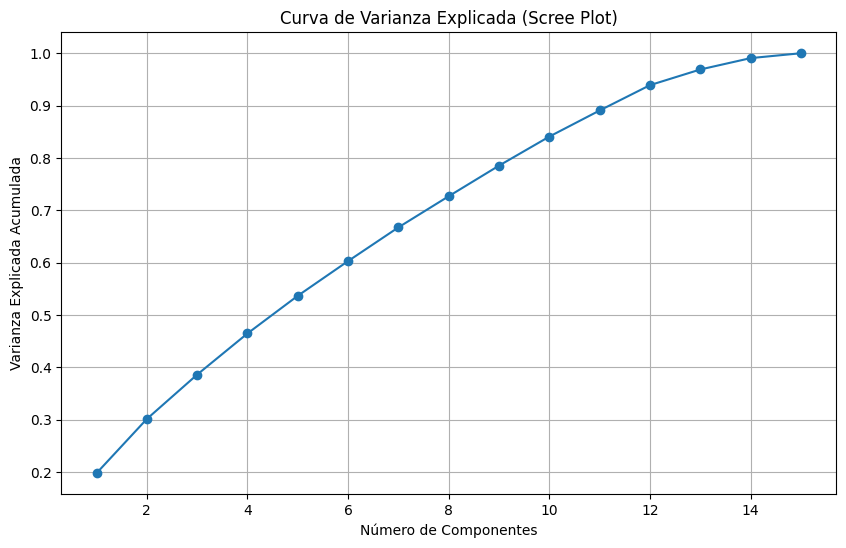

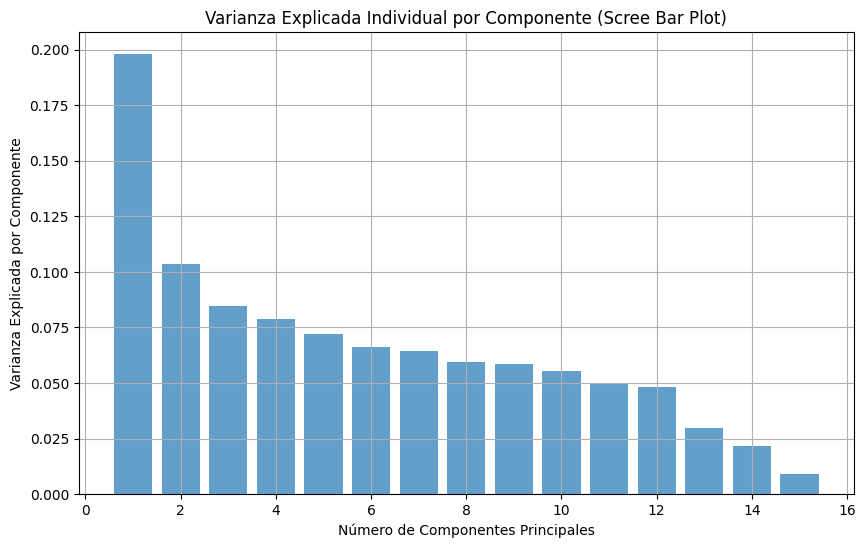

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.793075,0.613477,0.161454,-0.733176,-0.040733,2.767757,0.168152,-1.029415,-0.677640,0.131312,-1.009240,0.995022,-0.280681,-0.747129,-1.017845
1,-3.226902,1.157873,0.239483,0.549061,-0.987217,2.285060,-0.641542,-0.326262,0.349272,-0.689397,-1.002419,-0.427537,-0.350657,-0.263727,0.244960
2,-1.346183,-0.282283,-0.136581,1.028100,-0.949810,2.446663,-0.184407,-1.179479,0.262549,-0.993689,-0.587645,-0.693099,0.179224,-0.594978,-0.486695
3,-3.749210,-0.511391,0.795571,1.987911,-0.341224,1.446121,-2.911559,0.088483,-0.308759,1.825430,-1.231318,0.269581,0.298681,-0.519583,0.063368
4,-0.881078,0.205328,-0.546596,1.090179,-0.384353,2.820187,-1.209879,-0.208622,0.286138,0.014577,-0.245877,-0.164384,0.674752,0.055238,0.145672


In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_music.csv')

#Filtramos solo las columnas numéricas del dataframe
df_numeric = df.select_dtypes(include=['number'])

print("Columnas numéricas usadas para PCA:", df_numeric.columns.tolist())

#2)Estandarizamos datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

#3)Ajustamos PCA: calculamos tantos componentes como variables haya
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#4)Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

#5)Gráfica de scree plot para ver número óptimo de componentes
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Varianza Explicada (Scree Plot)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada por Componente')
plt.title('Varianza Explicada Individual por Componente (Scree Bar Plot)')
plt.grid(True)
plt.show()

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()


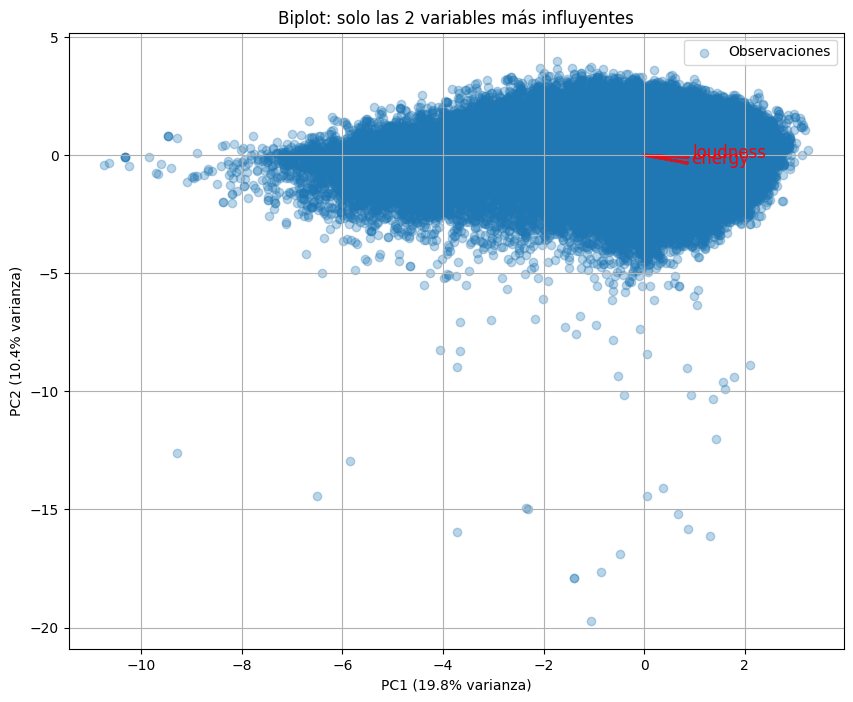

In [16]:
import numpy as np

#Calculamos las cargas de las variables en las dos primeras componentes
loadings = pca.components_.T[:, :2] * np.sqrt(pca.explained_variance_[:2])

pc1_loadings = np.abs(pca.components_[0, :])

top2_idx = np.argsort(pc1_loadings)[-2:]

#Filtramos las variables más importantes
top2_vars = df_numeric.columns[top2_idx]
top2_loadings = loadings[top2_idx, :]

plt.figure(figsize=(10,8))

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3, label='Observaciones')

for i, var in enumerate(top2_vars):
    plt.arrow(0, 0, top2_loadings[i,0], top2_loadings[i,1],
              color='r', alpha=0.8, head_width=0.02, linewidth=2)
    plt.text(top2_loadings[i,0]*1.1, top2_loadings[i,1]*1.1, var, color='r', fontsize=12)

plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% varianza)')
plt.title('Biplot: solo las 2 variables más influyentes')
plt.grid(True)
plt.legend()
plt.show()


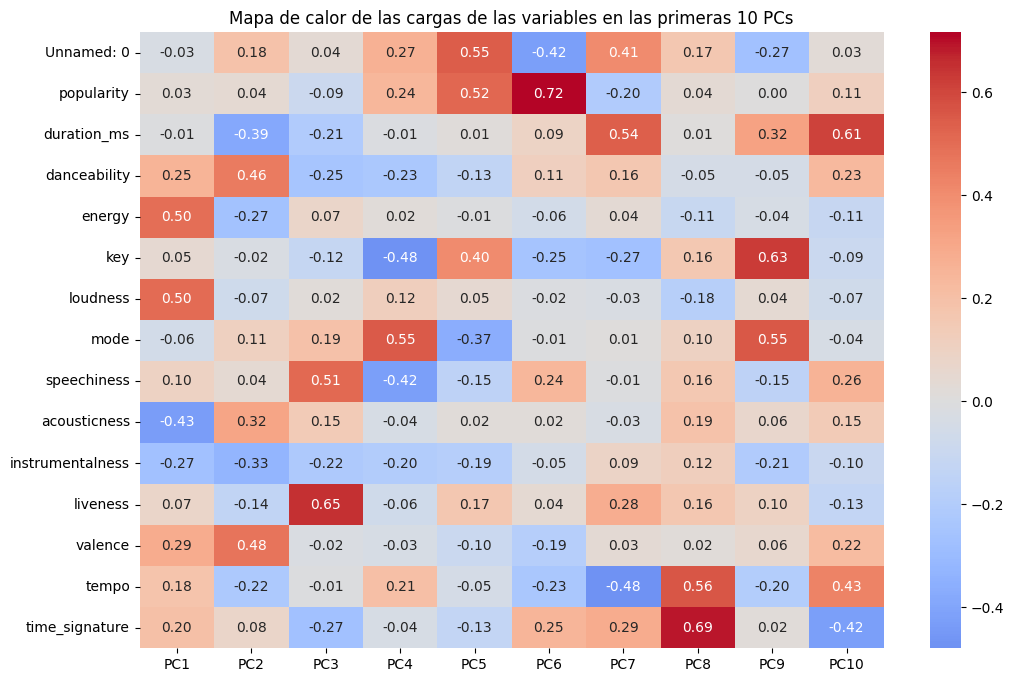

In [17]:
loadings_df = pd.DataFrame(pca.components_.T,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=df_numeric.columns)

plt.figure(figsize=(12,8))
sns.heatmap(loadings_df.iloc[:,:10], cmap='coolwarm', center=0,
            annot=True, fmt=".2f")
plt.title('Mapa de calor de las cargas de las variables en las primeras 10 PCs')
plt.show()
